In [1]:
import os

os.chdir(os.path.dirname(os.getcwd()))

In [2]:
import libs.analysis
import libs.ensemble
import libs.vars
import matplotlib
import xarray

matplotlib.rcParams.update({ 'font.size': 18 })

import warnings
warnings.filterwarnings('ignore')

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
# ----- SPECIFIC SETTINGS -----
component = 'SImon'
experiment = 'ssp585'
variable_id = 'siconc'

In [4]:
ensemble_si, weight_si = libs.ensemble.get_and_preprocess(
    component, 
    experiment, 
    variable_id
)

ensemble_prra, weight_prra = libs.ensemble.get_and_preprocess(
    'Amon', 
    experiment, 
    'prra'
)

ensemble_prsn, weight_prsn = libs.ensemble.get_and_preprocess(
    'Amon', 
    experiment, 
    'prsn'
)

ensemble_tas, weight_tas = libs.ensemble.get_and_preprocess(
    'Amon', 
    experiment, 
    'tas'
)

conf_evspsbl = [v for v in libs.vars.variables() if v['variable_id'] == 'evspsbl'][0]
ensemble_evspsbl, weight_evspsbl = libs.ensemble.get_and_preprocess(
    'Amon', 
    experiment, 
    'evspsbl',
    preprocess=conf_evspsbl['preprocess']
)

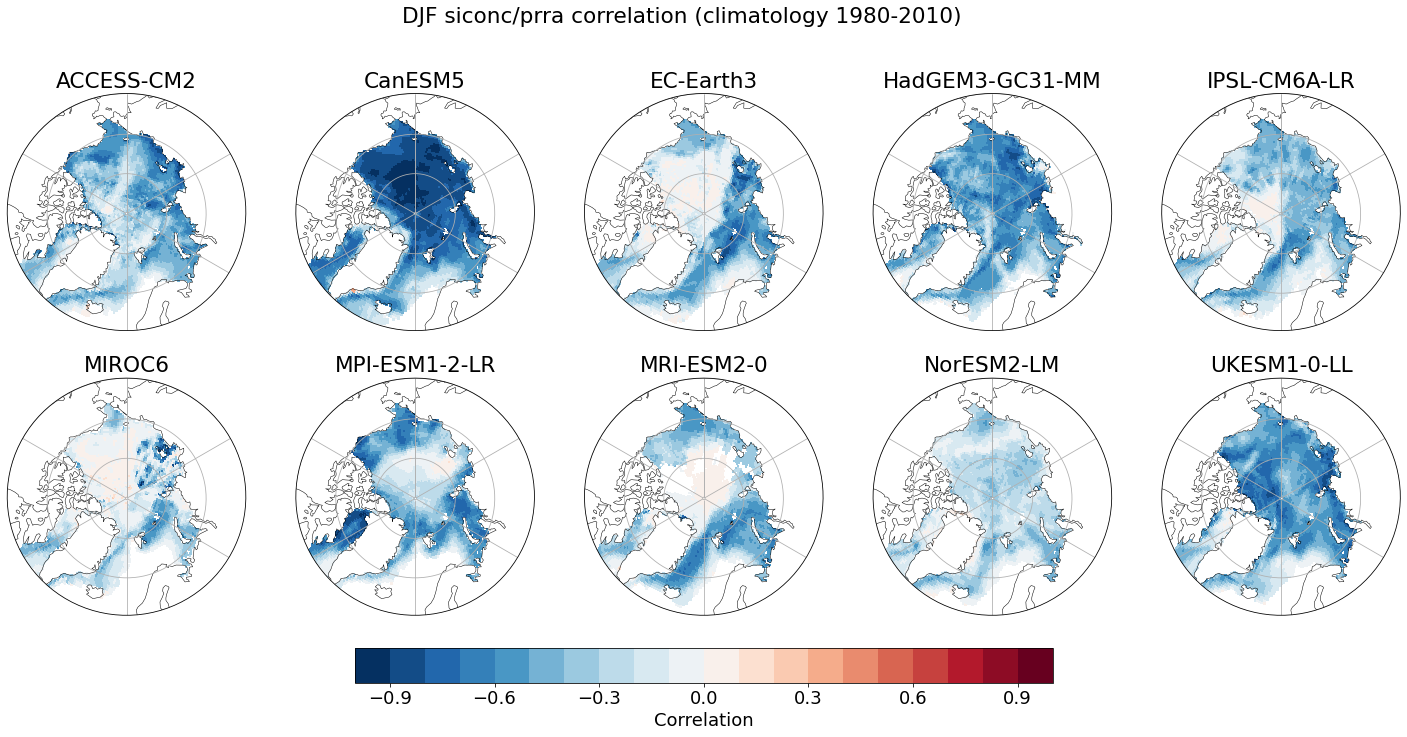

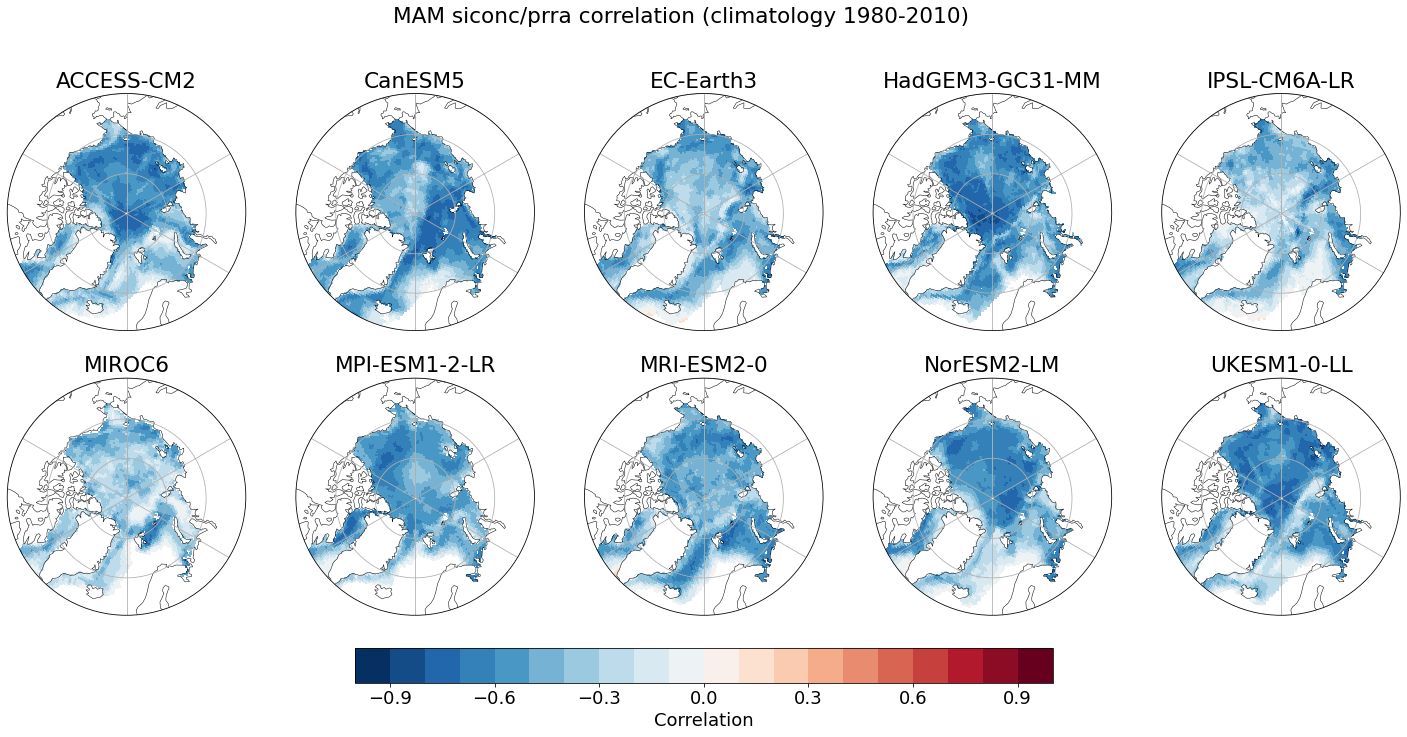

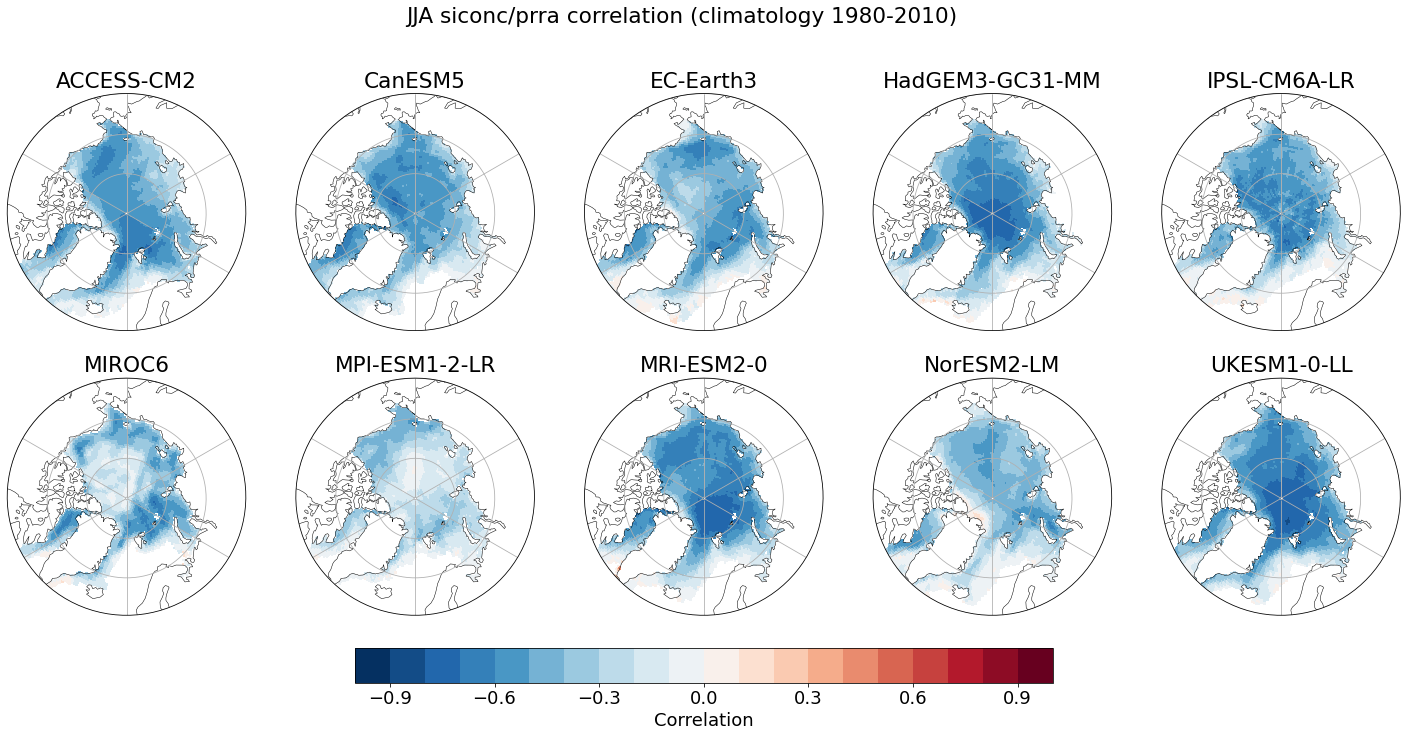

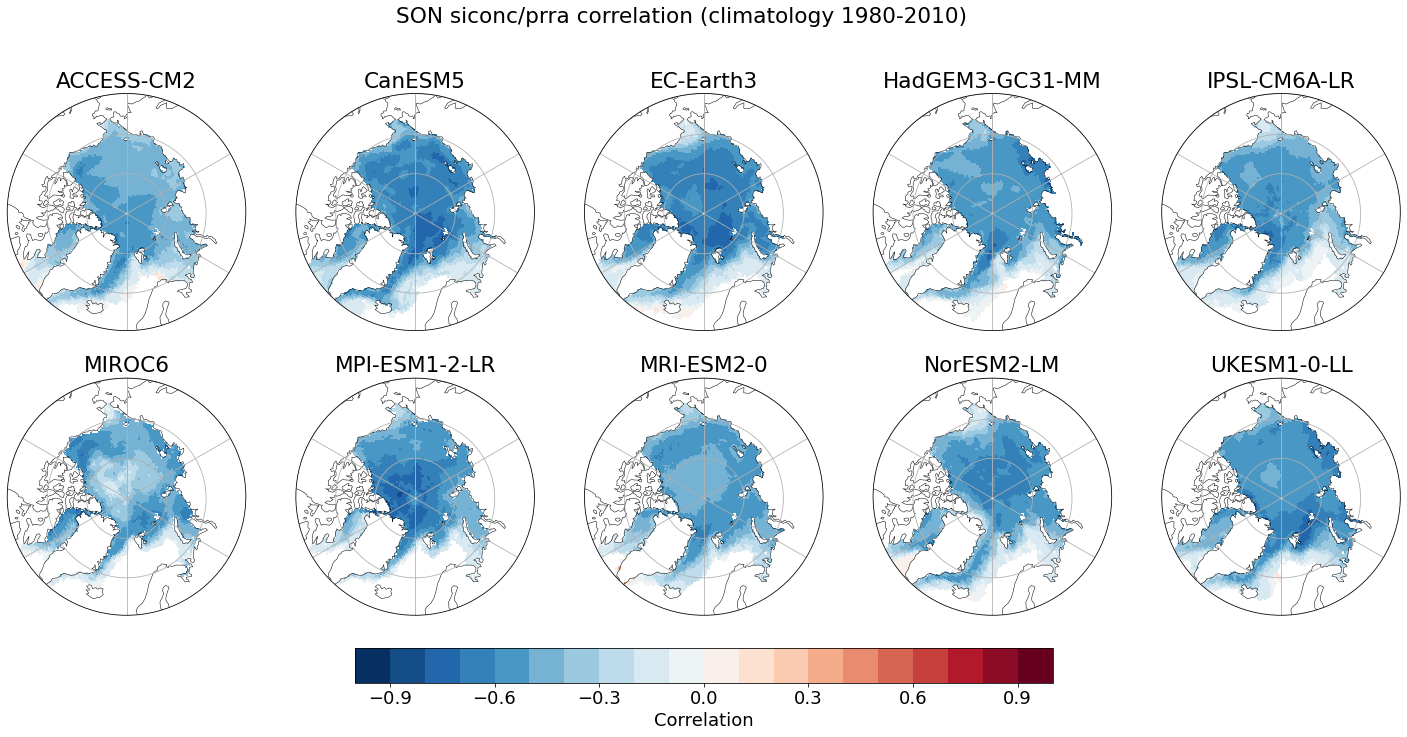

In [5]:
libs.analysis.correlation_spatial_clim(
    ensemble_si,
    ensemble_prra,
    shape=(2, 5)
);

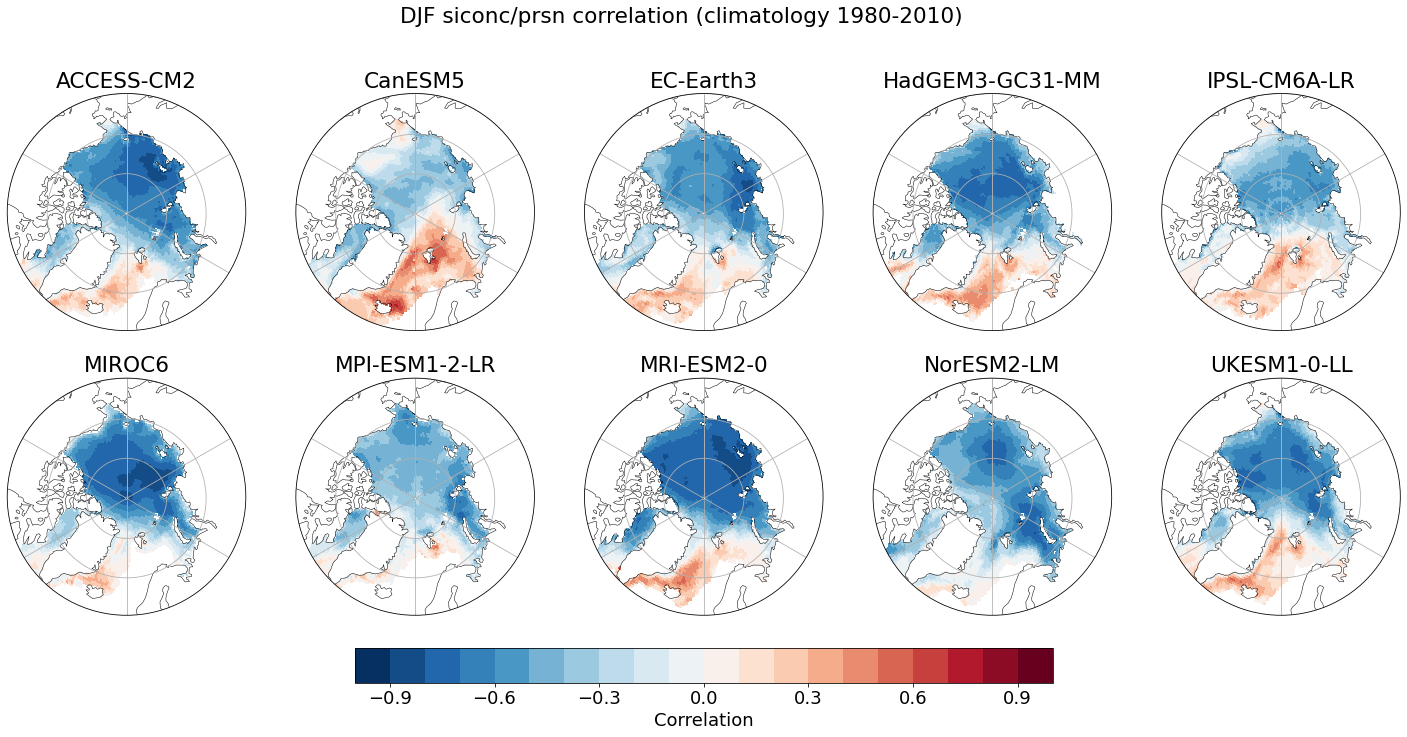

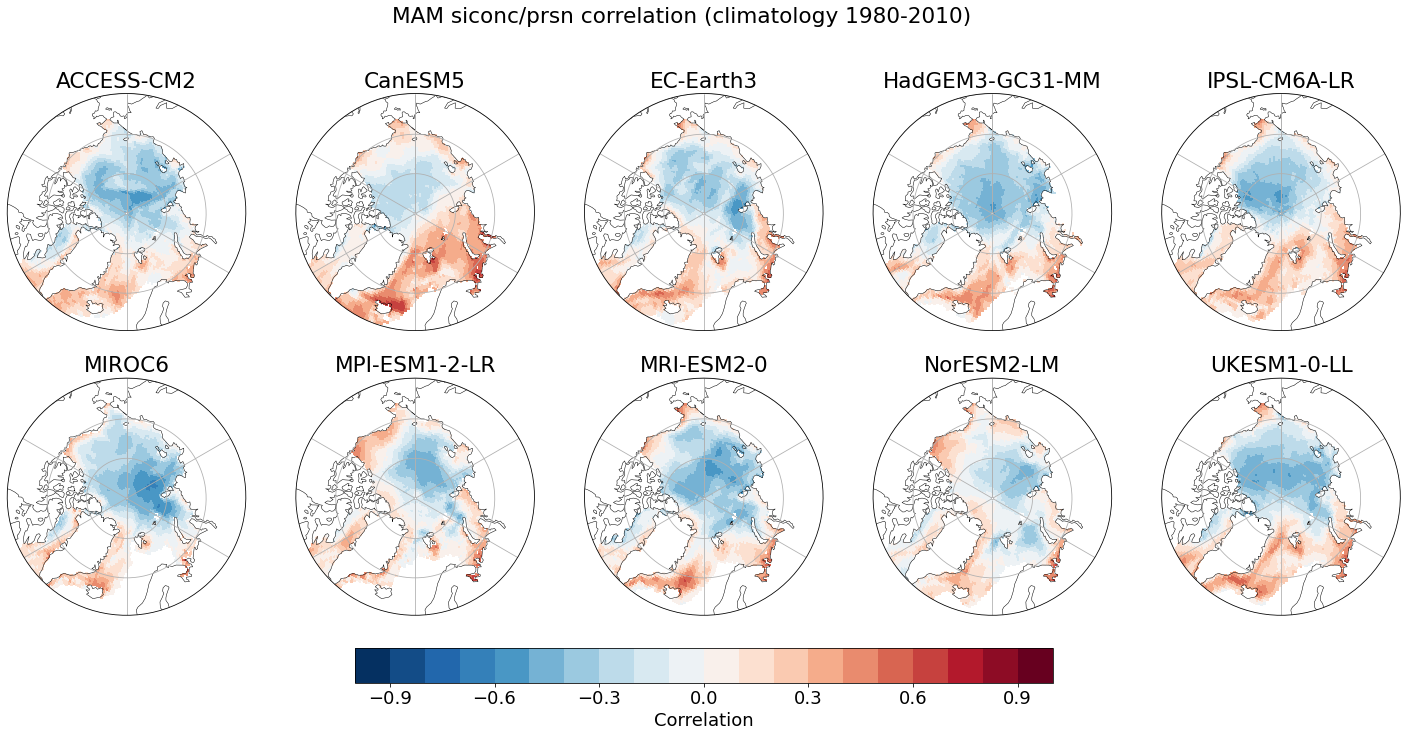

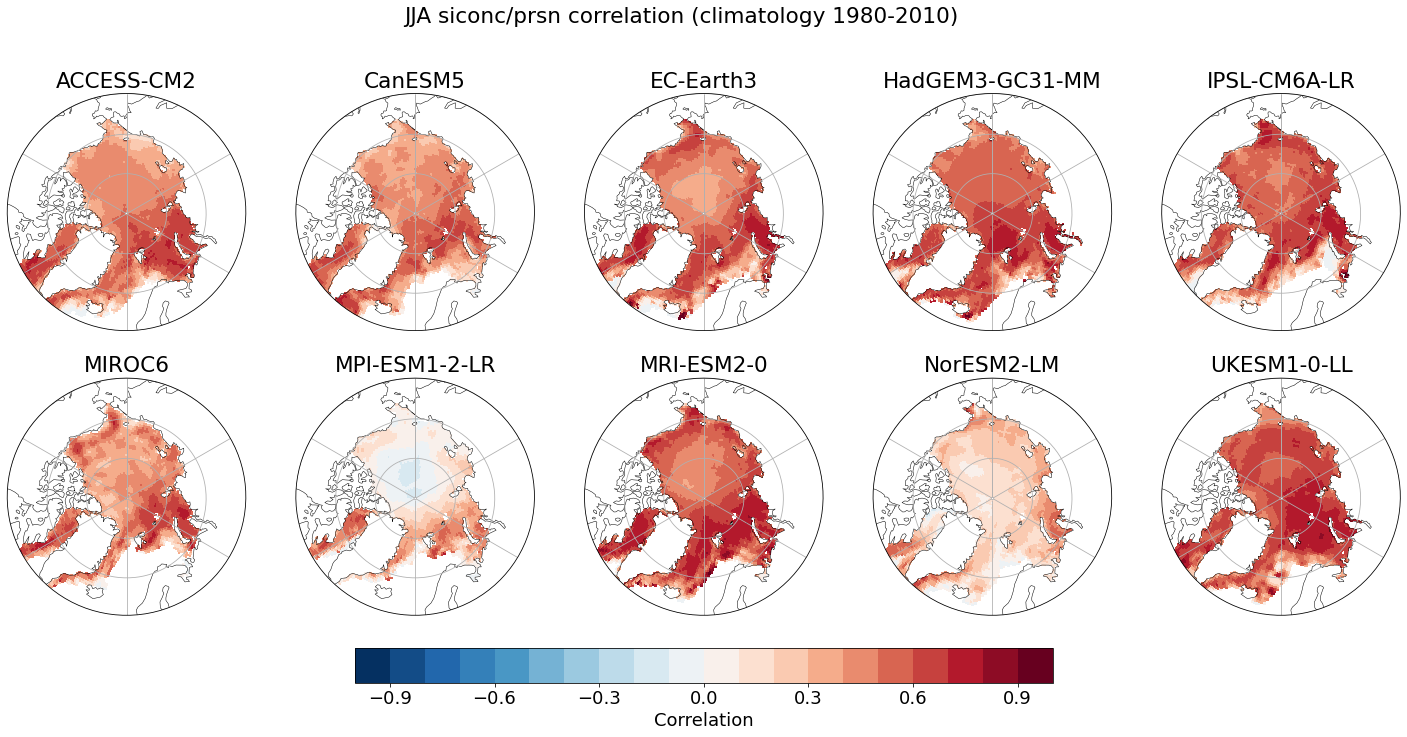

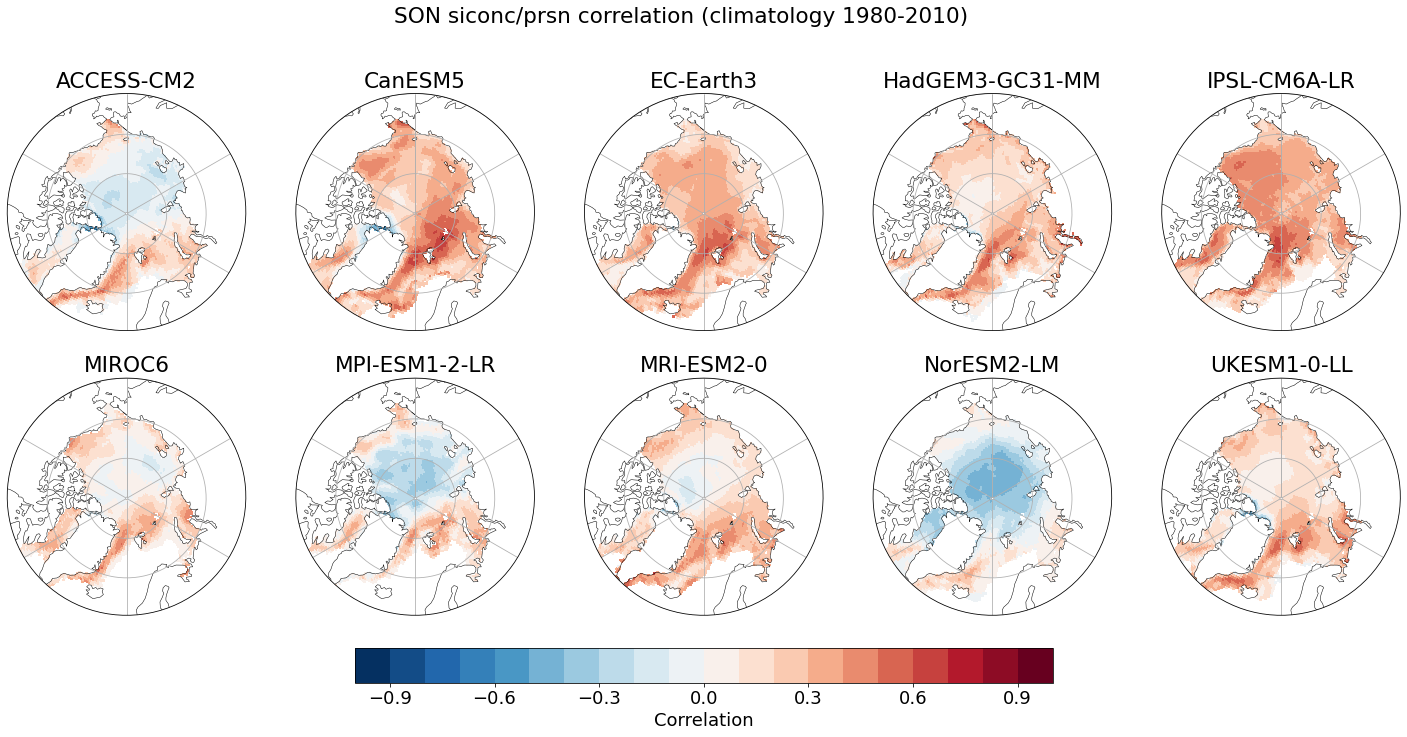

In [6]:
libs.analysis.correlation_spatial_clim(ensemble_si, ensemble_prsn, shape=(2, 5));

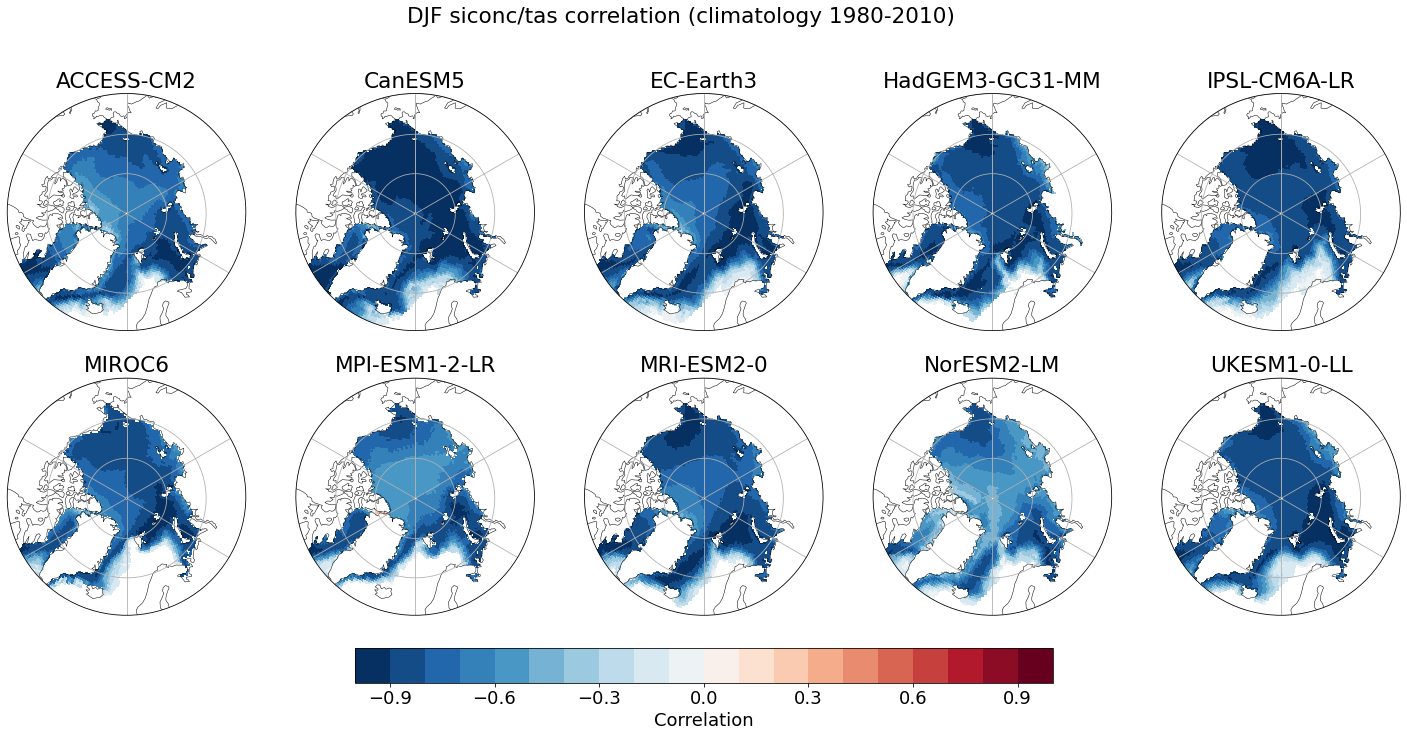

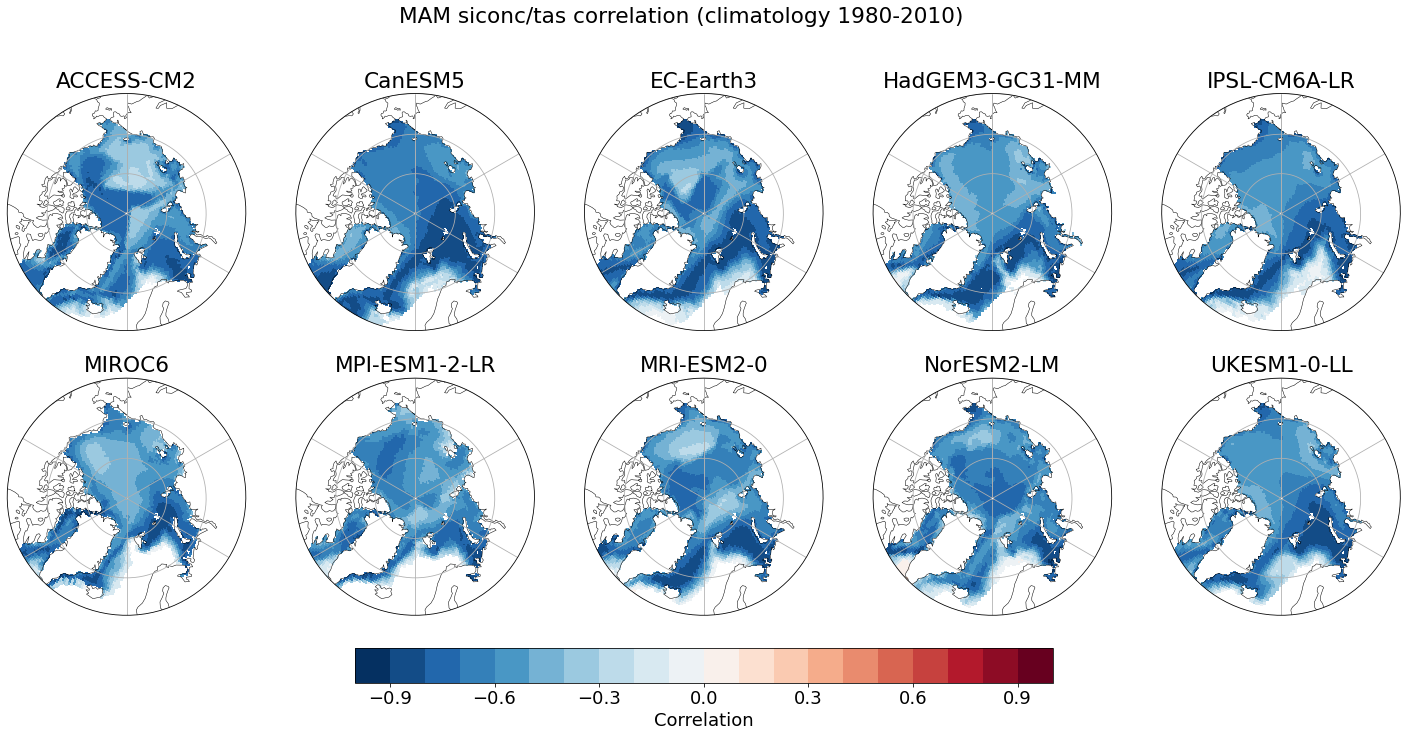

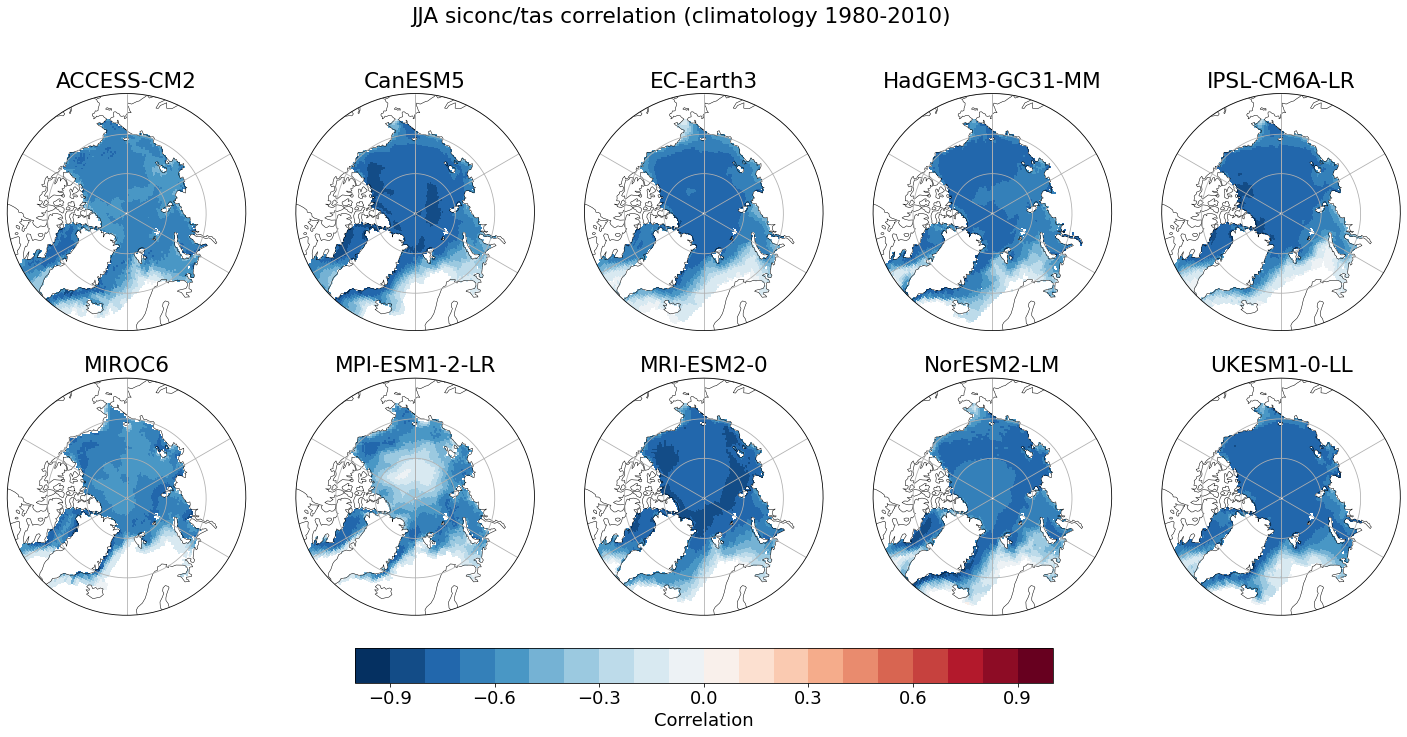

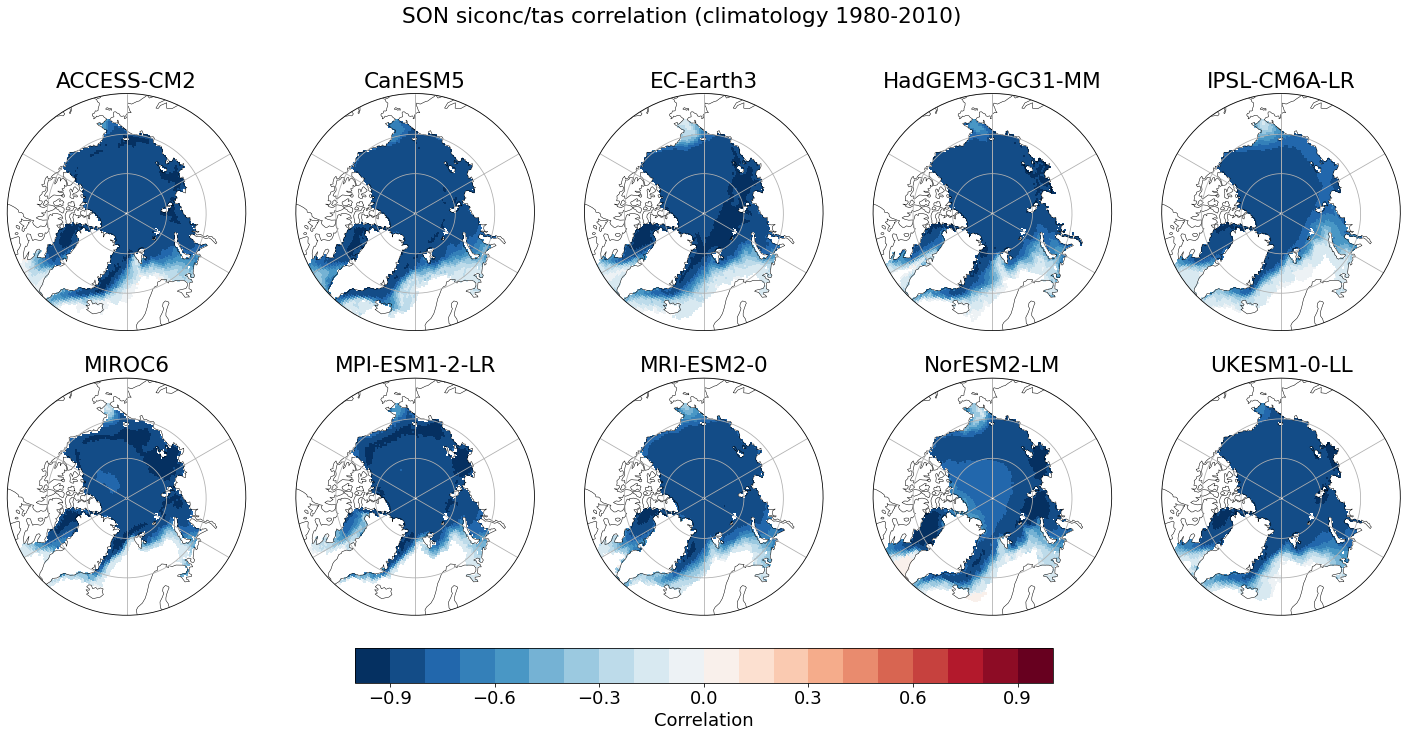

In [7]:
libs.analysis.correlation_spatial_clim(ensemble_si, ensemble_tas, shape=(2, 5));

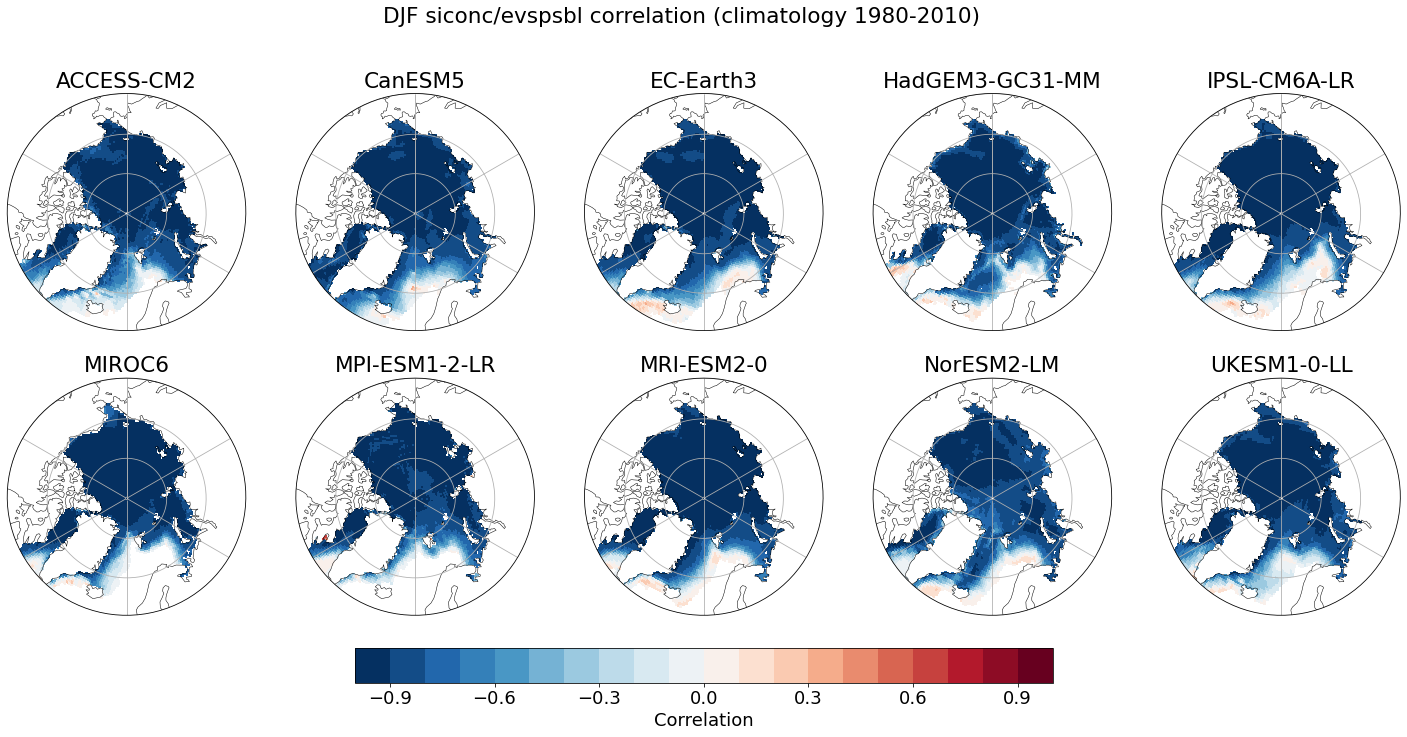

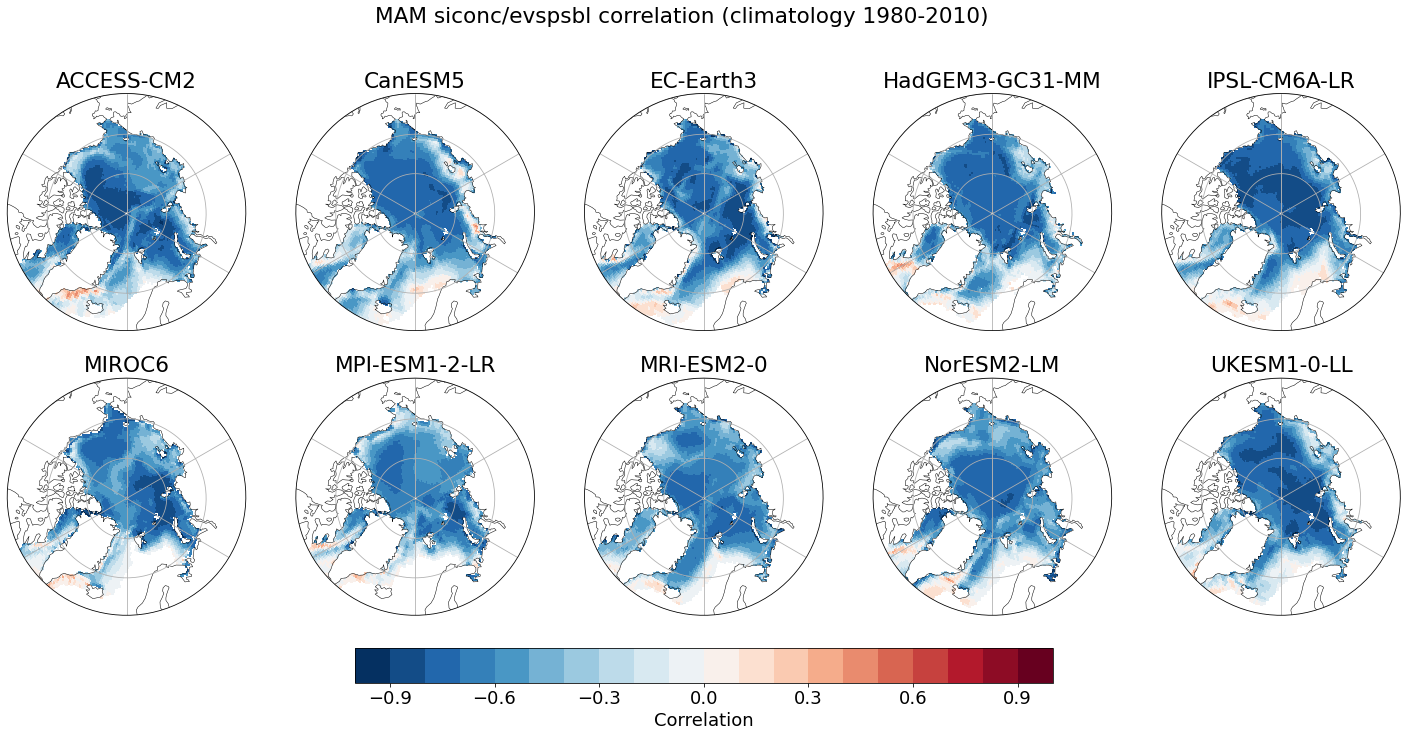

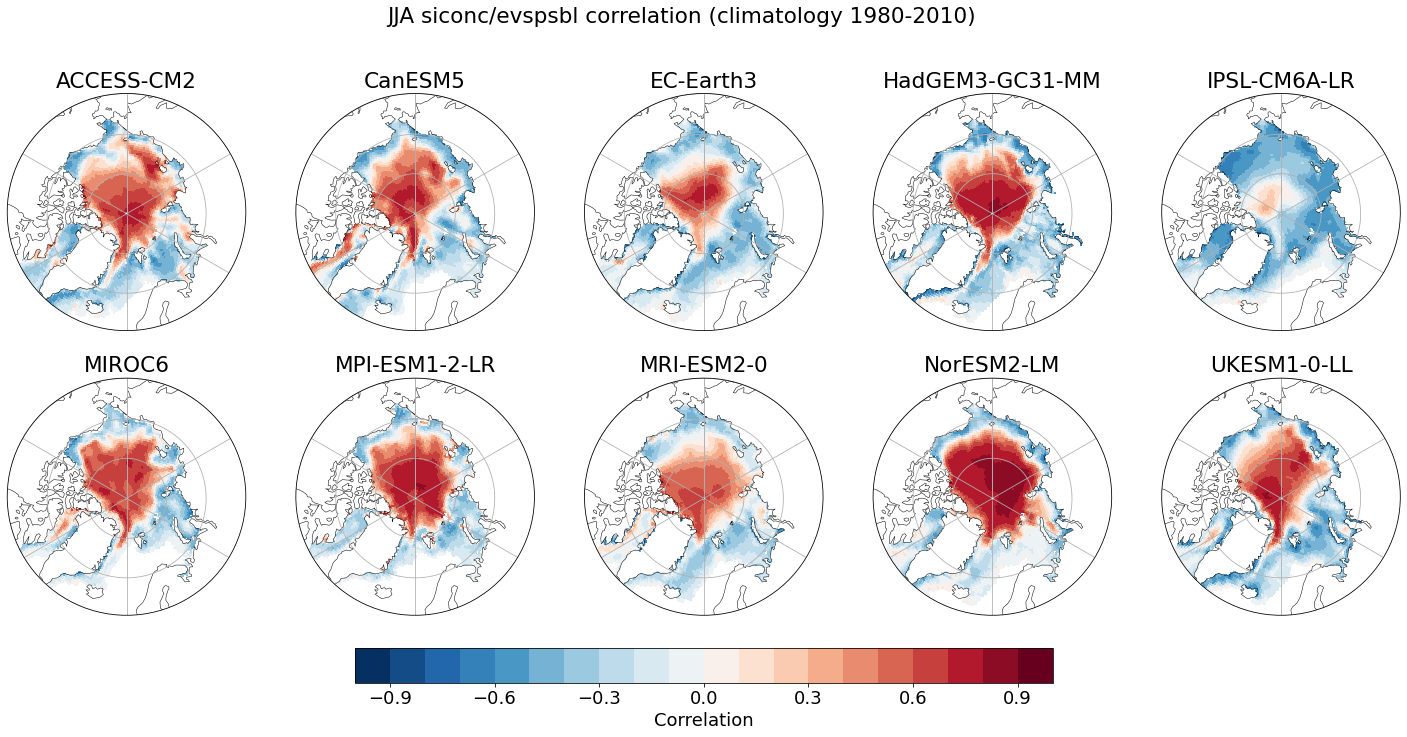

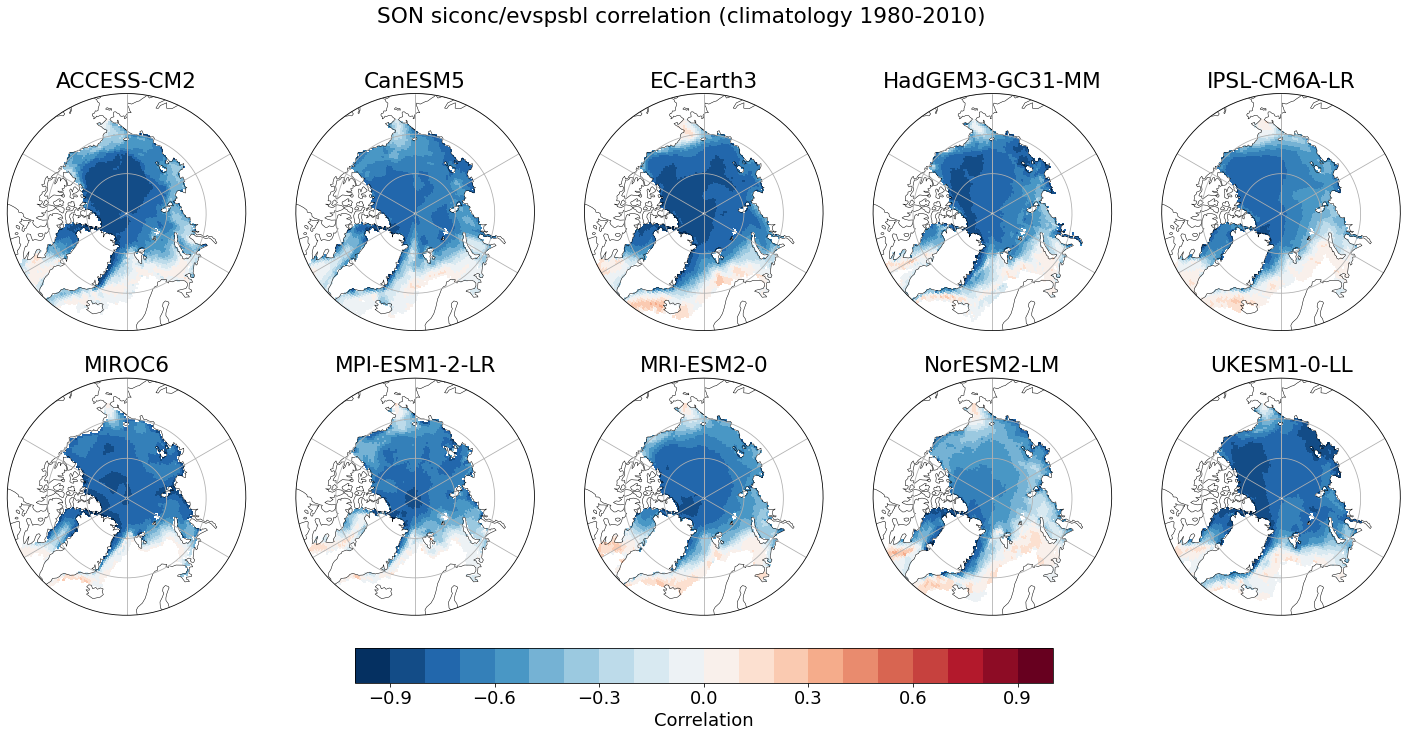

In [8]:
corr_si_evspsbl = libs.analysis.correlation_spatial_clim(
    ensemble_si,
    ensemble_evspsbl,
    correlation_period=slice('1980-01-01', '2101-01-01'),
    shape=(2, 5)
);

In [9]:
for i, season in enumerate(['DJF', 'MAM', 'JJA', 'SON']):
    print(season)
    corr_si_evspsbl_season = corr_si_evspsbl[i]
    arr = []
    for item in corr_si_evspsbl_season:
        corr_mean = float(item['data'].weighted(weight_si).mean())
        arr.append(corr_mean)
        print('->', item['label'], f'{corr_mean:.3f}')
        
    ensemble_mean = sum(arr) / len(arr)
    print('->', 'Ensemble mean', f'{ensemble_mean:.3f}')
    print('-----')

DJF
-> ACCESS-CM2 -0.777
-> CanESM5 -0.801
-> EC-Earth3 -0.778
-> HadGEM3-GC31-MM -0.765
-> IPSL-CM6A-LR -0.751
-> MIROC6 -0.819
-> MPI-ESM1-2-LR -0.801
-> MRI-ESM2-0 -0.801
-> NorESM2-LM -0.749
-> UKESM1-0-LL -0.778
-> Ensemble mean -0.782
-----
MAM
-> ACCESS-CM2 -0.543
-> CanESM5 -0.511
-> EC-Earth3 -0.537
-> HadGEM3-GC31-MM -0.521
-> IPSL-CM6A-LR -0.556
-> MIROC6 -0.521
-> MPI-ESM1-2-LR -0.493
-> MRI-ESM2-0 -0.518
-> NorESM2-LM -0.495
-> UKESM1-0-LL -0.550
-> Ensemble mean -0.524
-----
JJA
-> ACCESS-CM2 0.075
-> CanESM5 0.062
-> EC-Earth3 -0.073
-> HadGEM3-GC31-MM 0.058
-> IPSL-CM6A-LR -0.327
-> MIROC6 0.122
-> MPI-ESM1-2-LR 0.158
-> MRI-ESM2-0 0.058
-> NorESM2-LM 0.232
-> UKESM1-0-LL 0.017
-> Ensemble mean 0.038
-----
SON
-> ACCESS-CM2 -0.511
-> CanESM5 -0.490
-> EC-Earth3 -0.543
-> HadGEM3-GC31-MM -0.502
-> IPSL-CM6A-LR -0.450
-> MIROC6 -0.605
-> MPI-ESM1-2-LR -0.504
-> MRI-ESM2-0 -0.486
-> NorESM2-LM -0.370
-> UKESM1-0-LL -0.571
-> Ensemble mean -0.503
-----


In [10]:
import numpy as np

path_nsidc_mask = '_data/_cache/NSIDC_Regions_Masks_Ocean_nearest_s2d.nc'
nsidc_mask = xarray.open_mfdataset(paths=path_nsidc_mask, combine='by_coords').mask
nsidc_regions = [r for r in libs.vars.nsidc_regions() if len(r['values']) == 1]

#lats_lower = { 'values': [6, 7, 8], 'label': 'Labrador, Greenland, Barents' }
#lats_upper = { 'values': [9, 10, 11, 12, 13, 15], 'label': 'Labrador, Greenland, Barents' }
    
for i, season in enumerate(['DJF']):
    corr_si_evspsbl_season = corr_si_evspsbl[i]

    for region in nsidc_regions:
        arr = []
        print(region['label'])
        for item in corr_si_evspsbl_season:
            masked = item['data'].where(np.isin(nsidc_mask.values, region['values']))
            corr_mean = float(masked.weighted(weight_si).mean())
            arr.append(corr_mean)
            print('->', item['label'], f'{corr_mean:.3f}')
        
        ensemble_mean = sum(arr) / len(arr)
        print('Ensemble mean', f'{ensemble_mean:.3f}')
        print('-----')

Labrador
-> ACCESS-CM2 -0.740
-> CanESM5 -0.880
-> EC-Earth3 -0.801
-> HadGEM3-GC31-MM -0.540
-> IPSL-CM6A-LR -0.807
-> MIROC6 -0.702
-> MPI-ESM1-2-LR -0.654
-> MRI-ESM2-0 -0.714
-> NorESM2-LM -0.626
-> UKESM1-0-LL -0.699
Ensemble mean -0.716
-----
Greenland
-> ACCESS-CM2 -0.409
-> CanESM5 -0.488
-> EC-Earth3 -0.458
-> HadGEM3-GC31-MM -0.486
-> IPSL-CM6A-LR -0.387
-> MIROC6 -0.395
-> MPI-ESM1-2-LR -0.393
-> MRI-ESM2-0 -0.436
-> NorESM2-LM -0.475
-> UKESM1-0-LL -0.382
Ensemble mean -0.431
-----
Barents
-> ACCESS-CM2 -0.684
-> CanESM5 -0.653
-> EC-Earth3 -0.527
-> HadGEM3-GC31-MM -0.542
-> IPSL-CM6A-LR -0.366
-> MIROC6 -0.648
-> MPI-ESM1-2-LR -0.620
-> MRI-ESM2-0 -0.618
-> NorESM2-LM -0.593
-> UKESM1-0-LL -0.688
Ensemble mean -0.594
-----
Kara
-> ACCESS-CM2 -0.913
-> CanESM5 -0.880
-> EC-Earth3 -0.916
-> HadGEM3-GC31-MM -0.886
-> IPSL-CM6A-LR -0.885
-> MIROC6 -0.915
-> MPI-ESM1-2-LR -0.907
-> MRI-ESM2-0 -0.920
-> NorESM2-LM -0.876
-> UKESM1-0-LL -0.879
Ensemble mean -0.898
-----
Siberian